# Seurat tutorial

https://satijalab.org/seurat/articles/pbmc3k_tutorial

## Setup the Seurat Object

#raw dataをダウンロード→~/work/seurat/に転送
#ターミナルで実行
tar zxvf pbmc3k_filtered_gene_bc_matrices.tar.gz
#→~/work/seurat/filtered_gene_bc_matrices/hg19/のディレクトリに3ファイル
#barcodes.tsv  genes.tsv  matrix.mtx

In [1]:
#R
setwd("~/work/seurat")
.libPaths("~/R_4.1.3_library")
#.libPaths("~/R_biocmanager_seurat")

In [2]:
options(repr.plot.width=10, repr.plot.height=6)
#options(repr.plot.width=NULL, repr.plot.height=NULL)
#インタラクティブな出力に適したサイズに調整（グラフの幅を5インチ、高さを4インチに設定）

### BiocManagerでインストール（インストール完了→とばす）

In [2]:
install.packages("BiocManager")

 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/oguma/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



In [3]:
BiocManager::install("Seurat")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.25), R 4.1.3 (2022-03-10)

Installing package(s) 'Seurat'

Warning message:
“ 依存対象 (dependency) ‘Matrix’ が利用できません ”
 依存対象 (dependency) ‘dotCall64’, ‘gtools’, ‘caTools’, ‘tensor’, ‘sp’, ‘spam’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘gridExtra’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘leiden’, ‘lmtest’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘RANN’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘spatstat.explore’, ‘spatstat.geom’ もインストールします 


Warning message in install.packages(...):
“installation of package ‘SeuratObject’ had non-zero 

In [4]:
#Matrixパッケージ
#Depends:	R (≥ 4.4.0), methods
#install.packages("Matrix")

if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}
remotes::install_version("Matrix", version = ">= 1.5-0")



 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/oguma/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



In [7]:
BiocManager::install("Seurat")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.25), R 4.1.3 (2022-03-10)

Installing package(s) 'Seurat'

 依存対象 (dependency) ‘SeuratObject’ もインストールします 


Installation paths not writeable, unable to update packages
  path: /rshare1/ZETTAI_path_WA_slash_home_KARA/home/khat1/miniconda3/envs/renv/lib/R/library
  packages:
    askpass, backports, BiocManager, bit, bit64, bitops, boot, broom, bslib,
    cachem, callr, cli, clock, cluster, codetools, colorspace, commonmark,
    cpp11, crayon, crul, curl, data.table, dbplyr, digest, e1071, evaluate,
    fansi, farver, fastmap, FNN, fontawesome, foreign, fs, future,
    future.apply, gargle, gert, ggplot2, glmnet, globals, glue, googledrive,
    googlesheets4, gtable, hardhat, haven, hexbin, highr, htmlwidgets, httpuv,
    httr, httr2, ipred, jsonlite, Ker

In [3]:
library(dplyr)
library(Seurat)
library(patchwork)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 


 要求されたパッケージ SeuratObject をロード中です 

 要求されたパッケージ sp をロード中です 


 次のパッケージを付け加えます: ‘SeuratObject’ 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, t 




### データの読み込み

In [4]:
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "/home/oguma/work/seurat/filtered_gene_bc_matrices/hg19/")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 1 layer present: counts

In [4]:
# Lets examine a few genes in the first thirty cells
pbmc.data[c("CD3D", "TCL1A", "MS4A1"), 1:30]

##　. は 0 (no molecules detected)。scRNA-seqマトリックスのほとんどの値は0
##→Seurartは可能な限り疎行列表現を使用する（メモリや計算の効率up）。

  [[ suppressing 30 column names ‘AAACATACAACCAC-1’, ‘AAACATTGAGCTAC-1’, ‘AAACATTGATCAGC-1’ ... ]]



3 x 30 sparse Matrix of class "dgCMatrix"
                                                                   
CD3D  4 . 10 . . 1 2 3 1 . . 2 7 1 . . 1 3 . 2  3 . . . . . 3 4 1 5
TCL1A . .  . . . . . . 1 . . . . . . . . . . .  . 1 . . . . . . . .
MS4A1 . 6  . . . . . . 1 1 1 . . . . . . . . . 36 1 2 . . 2 . . . .

In [6]:
##通常の密行列（pbmc.dataを密行列に変換）
dense.size <- object.size(as.matrix(pbmc.data))
dense.size

##疎行列
sparse.size <- object.size(pbmc.data)
sparse.size

dense.size/sparse.size

709591472 bytes

29905192 bytes

23.7 bytes

## Standard pre-processing workflow

### QC and selecting cells for further analysis

1. ユニークな遺伝子の数:細胞の品質評価
 - 低品質な細胞や空のdropletsは、通常、非常に少ない遺伝子しか持たない。
 - 複数の細胞が含まれていた場合は遺伝子数が異常に多くなる。
2. 検出された分子の総数:ユニークな遺伝子数と強く相関。

3. ミトコンドリアゲノムへのマッピング率:
 - 低品質の細胞や死にかけている細胞は、しばしばミトコンドリアに対するマッピング率が高い（ミトコンドリア由来の遺伝子発現が多い）。

In [5]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
#ミトコンドリア遺伝子からのカウントの割合を算出→percent.mtに格納

#PercentageFeatureSet():特定の特徴（ここではミトコンドリア関連遺伝子）からのカウントが、全体のカウントに対してどの程度を占めるかを計算する。
#pattern = "^MT-"は、遺伝子名が「MT-」で始まる遺伝子（通常はミトコンドリア遺伝子）を対象にする。

#pbmc[["percent.mt"]]:Seuratオブジェクト（ここではpbmc）のメタデータに新しい列（percent.mt）を追加。この列には、ミトコンドリア遺伝子からのカウントの割合が保存される。

In [11]:
# Show QC metrics for the first 5 cells
head(pbmc@meta.data, 5)
##Seuratオブジェクトのメタデータ部分に格納されたデータフレーム

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACATACAACCAC-1,pbmc3k,2419,779,3.0177759
AAACATTGAGCTAC-1,pbmc3k,4903,1352,3.7935958
AAACATTGATCAGC-1,pbmc3k,3147,1129,0.8897363
AAACCGTGCTTCCG-1,pbmc3k,2639,960,1.7430845
AAACCGTGTATGCG-1,pbmc3k,980,521,1.2244898


QCのfilter
- We filter cells that have unique feature counts over 2,500 or less than 200
- We filter cells that have >5% mitochondrial counts

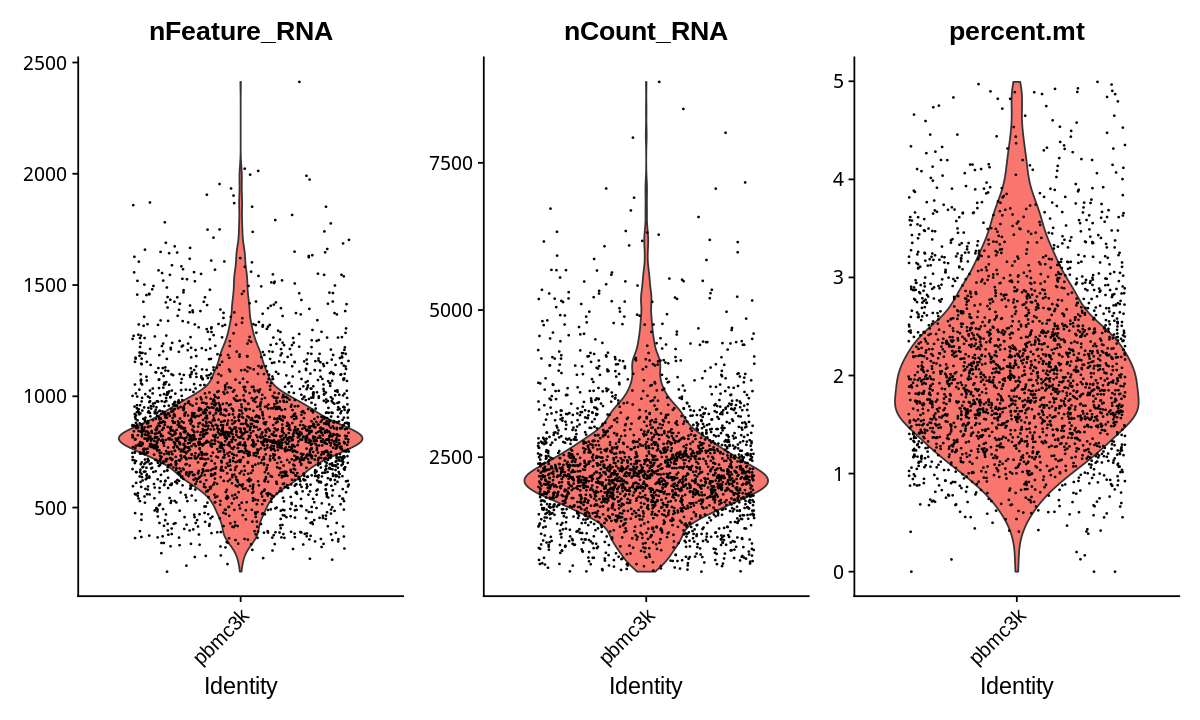

In [15]:
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

##VlnPlot():Seuratで提供される関数。バイオリンプロットを描画。(ncol = 3: 出力されるプロットを3列で並べる指定)

In [18]:
DefaultAssay(pbmc)
#head(pbmc@data, 5)→Error in head(pbmc@data, 5):  名前 "data" というスロットが、クラス "Seurat" のこのオブジェクトには存在しません
head(pbmc@counts, 5)

[1] "RNA"

ERROR: Error in head(pbmc@counts, 5):  名前 "counts" というスロットが、クラス "Seurat" のこのオブジェクトには存在しません 


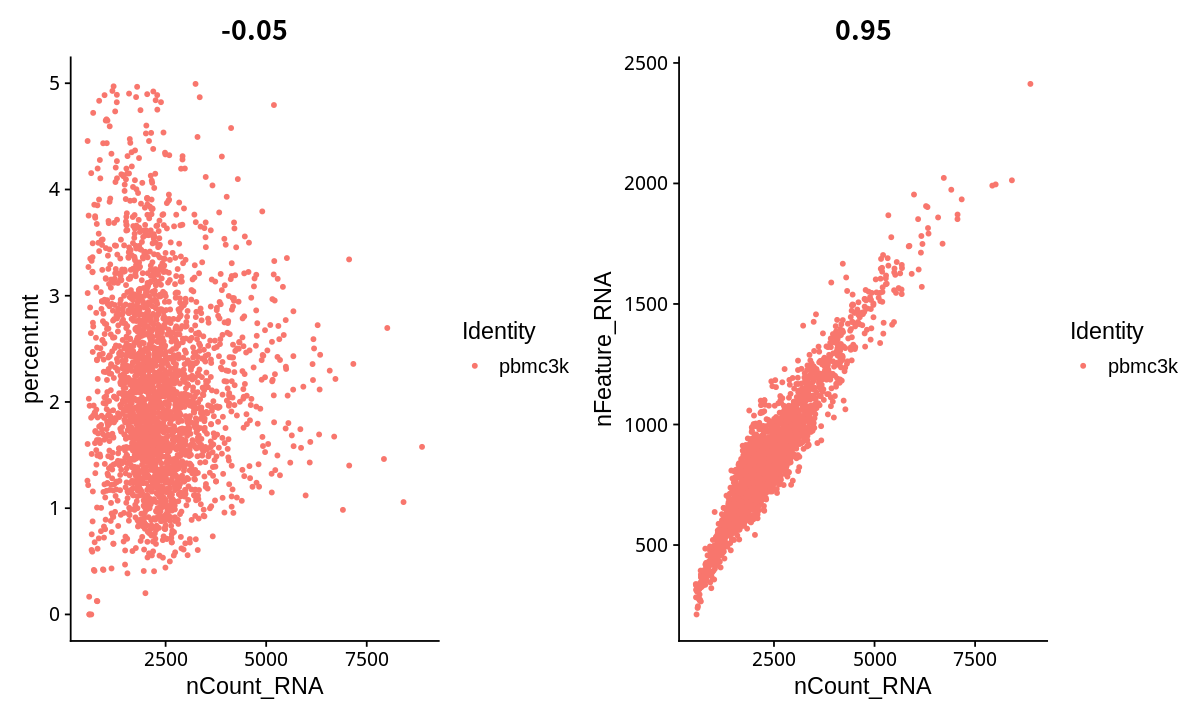

In [16]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [6]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
##pbmcオブジェクトのサブセット（細胞のフィルタリング）を作成。
##各細胞で検出された遺伝子数が200より多く2500未満で、ミトコンドリアリードの割合が全体の5%未満の細胞のみ保持。

## Normalizing the data

- データの正規化: RNAの発現値を正規化することで、細胞間の比較を可能にします。
- LogNormalize: デフォルトの正規化手法で、発現の合計で割り算し、スケールファクター（デフォルトでは10000）をかけた後、対数変換。標準的な正規化手法で、scRNA-seq分析で広く使用されているが、各細胞のRNA分子数が等しいという仮定に依存。
- SCTransform: 代替手法で、通常の正規化手法よりも柔軟で、RNA分子数の仮定を避けることができる。NormalizeData、FindVariableFeatures、またはScaleDataを実行する必要ない。

In [7]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
##パラメーターを指定
##正規化された値は、pbmc[["RNA"]]$dataに格納される

Normalizing layer: counts



In [10]:
pbmc <- NormalizeData(pbmc)
##パラメーターはデフォルト（上と同じ）

Normalizing layer: counts



## Identification of highly variable features (feature selection)

細胞間での変動が大きい遺伝子を計算する。\
→シングルセルデータセットにおける生物学的シグナルを強調するために有用。

- FindVariableFeatures() 関数：選択した方法を使用して変動の大きい遺伝子を特定する。
細胞間の平均と分散の関係を直接モデル化（前バージョンよりも精度up）。\
→PCAなどの下流の解析に使用。
- VariableFeaturePlot() 関数：これらの変動の大きい特徴を可視化。
- LabelPoints() 関数：上位10の遺伝子にラベルを付け、プロットに表示。

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


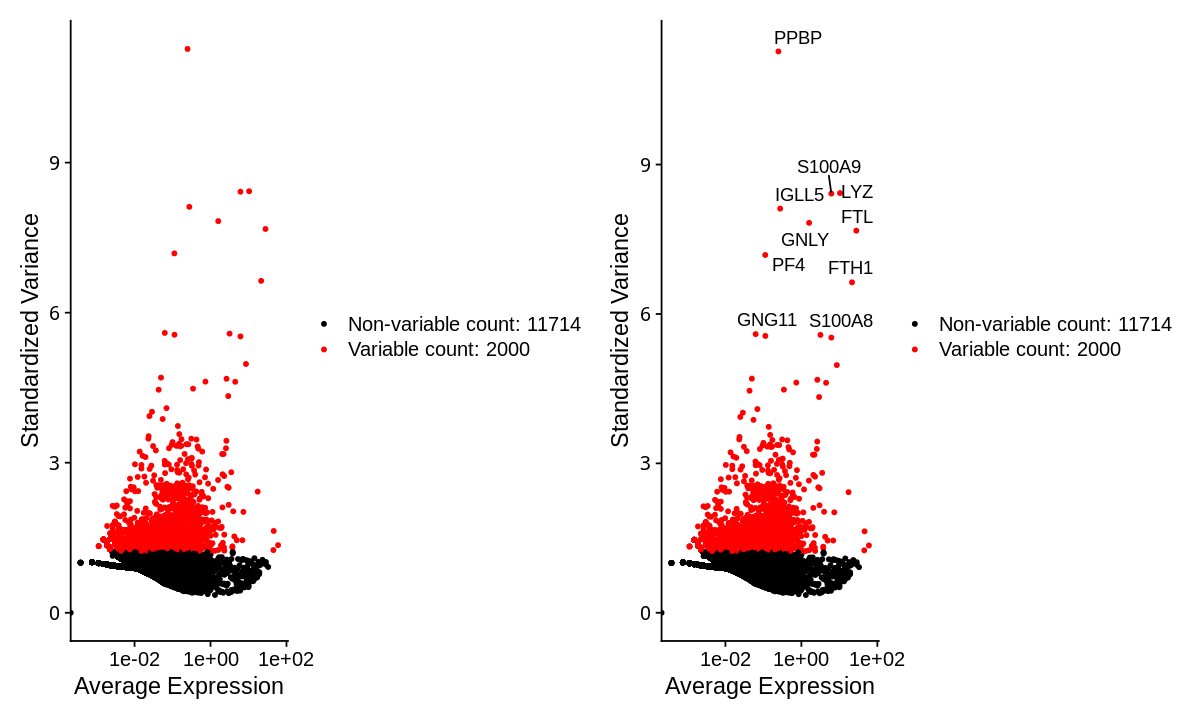

In [8]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
##デフォルトでは、各データセットに対して2,000の変動が大きい特徴を返す。
##細胞間で変動が大きい遺伝子2000個のみにする

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

##変動が大きい上位10の遺伝子を特定、可視化

## Scaling the data

線形変換(scaling)：PCAなどの次元削減手法の実行前に標準的な前処理。\
平均0, 分散1に正規化→下流の解析で同じ重みをもつ（高発現の遺伝子が支配的にならないように）

In [9]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
##スケーリングの結果は pbmc[["RNA"]]$scale.data に格納
##デフォルトでは、変動の大きい特徴(variable features)のみがスケーリング。
##features 引数を指定することで追加の特徴をスケーリングすることも可能。

Centering and scaling data matrix



In [ ]:
#参考
#pbmc <- ScaleData(pbmc, vars.to.regress = "percent.mt")
##特定の要因(ミトコンドリアの割合)に関連する変動を「回帰除去」することが可能
##vars.to.regress = "percent.mt"：スケーリング中に回帰される変数を指定。ここでは、ミトコンドリア遺伝子の発現割合（percent.mt）を使用。この変数を回帰することで、ミトコンドリアの発現による影響を取り除くことができる。
##SCTransform()を用いた方がよい。

## Perform linear dimensional reduction

スケーリングされたデータに対してPCAを実行。

In [10]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
##デフォルトでは、変動の大きい特徴のみが入力として使用される。
##fiatures引数を指定して、異なるサブセットを選択することも可能。
##カスタムのサブセットを使う場合は、先にScaleDataに通すのを忘れずに

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

出力内容
- 最初の主成分における正の負荷および負の負荷を持つ遺伝子のリスト
 - 正の負荷：単一細胞のデータセット内で相関関係を示す遺伝子群
 - 負の負荷：反相関関係を示す遺伝子群

In [11]:
# Examine and visualize PCA results a few different ways
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


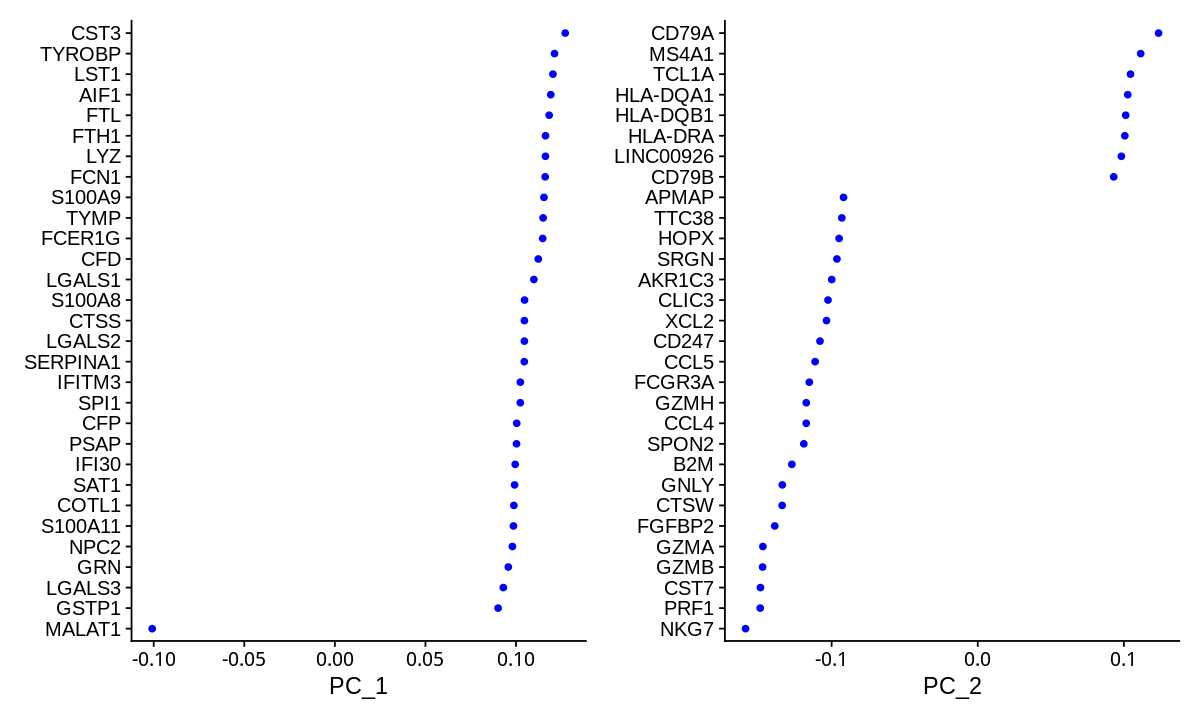

In [22]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

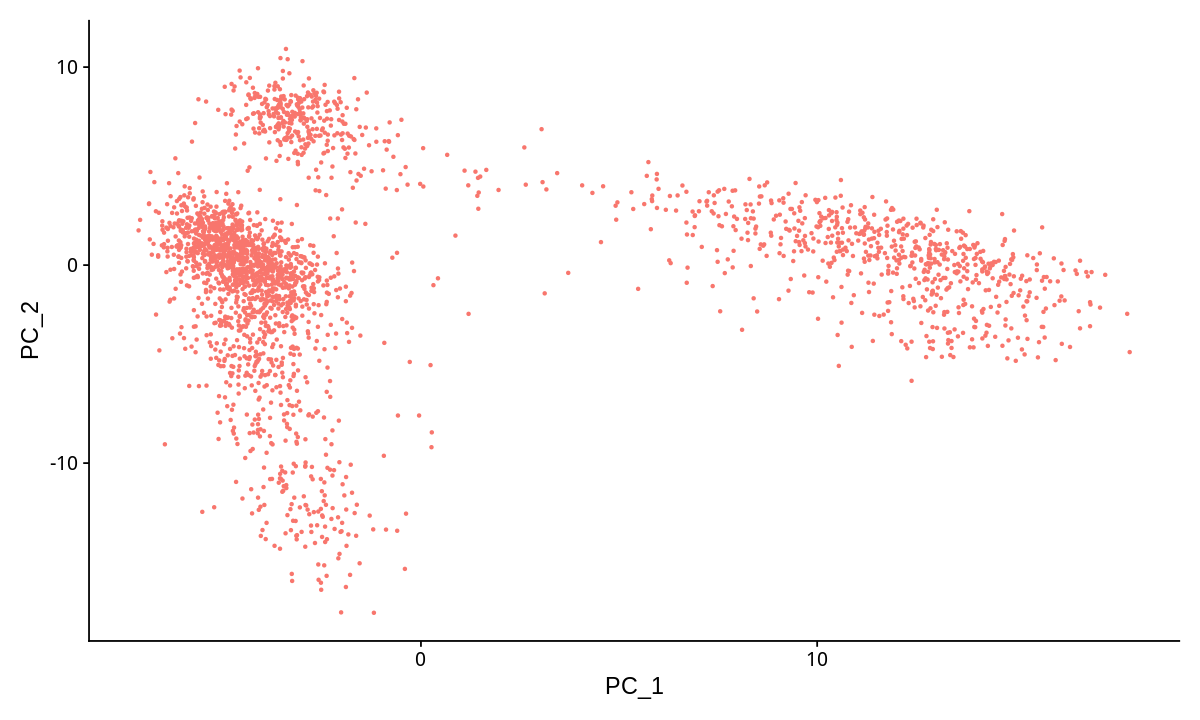

In [23]:
DimPlot(pbmc, reduction = "pca") + NoLegend()
##reduction = "pca"：PCAの結果に基づいたプロットを作成
##NoLegend()：凡例の非表示

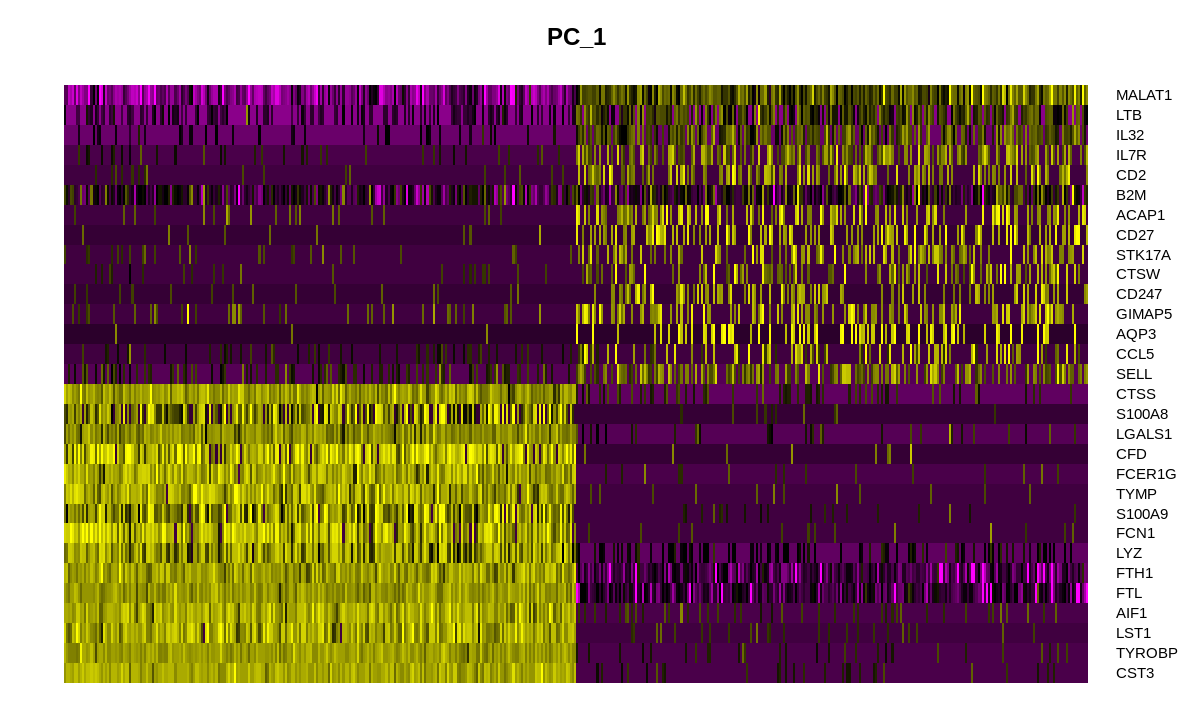

In [24]:
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)
#PCAの最初の次元(PC_1)に基づいたヒートマップが作成され、細胞と特徴がPCAスコアに従って並べ替えられる。
##dims：使用する主成分の数（dims = 1：PC1のみ）
##cells：プロットに表示する細胞の数（cells = 500：両端に位置する500細胞）
##balanced = TRUE：細胞と特徴の表示をバランスよく行う
##色：発現レベル

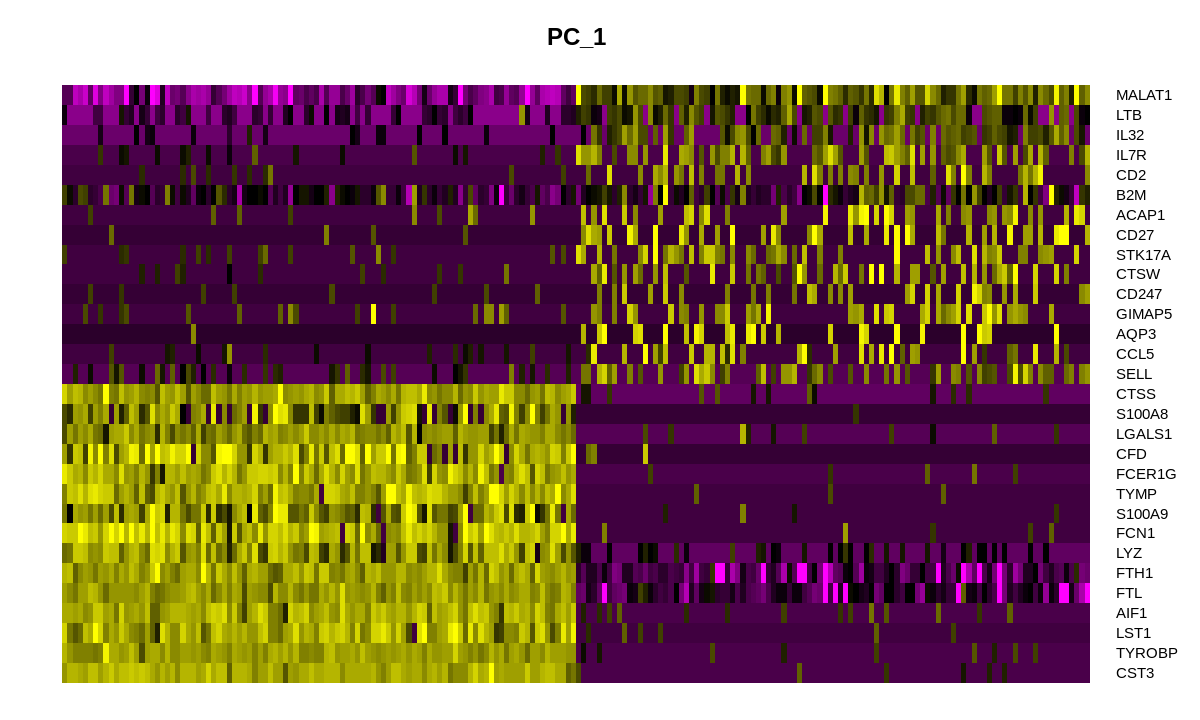

In [27]:
##試し
#DimHeatmap(pbmc, dims = 1, cells = 500, balanced = FALSE)
DimHeatmap(pbmc, dims = 1, cells = 200, balanced = TRUE)

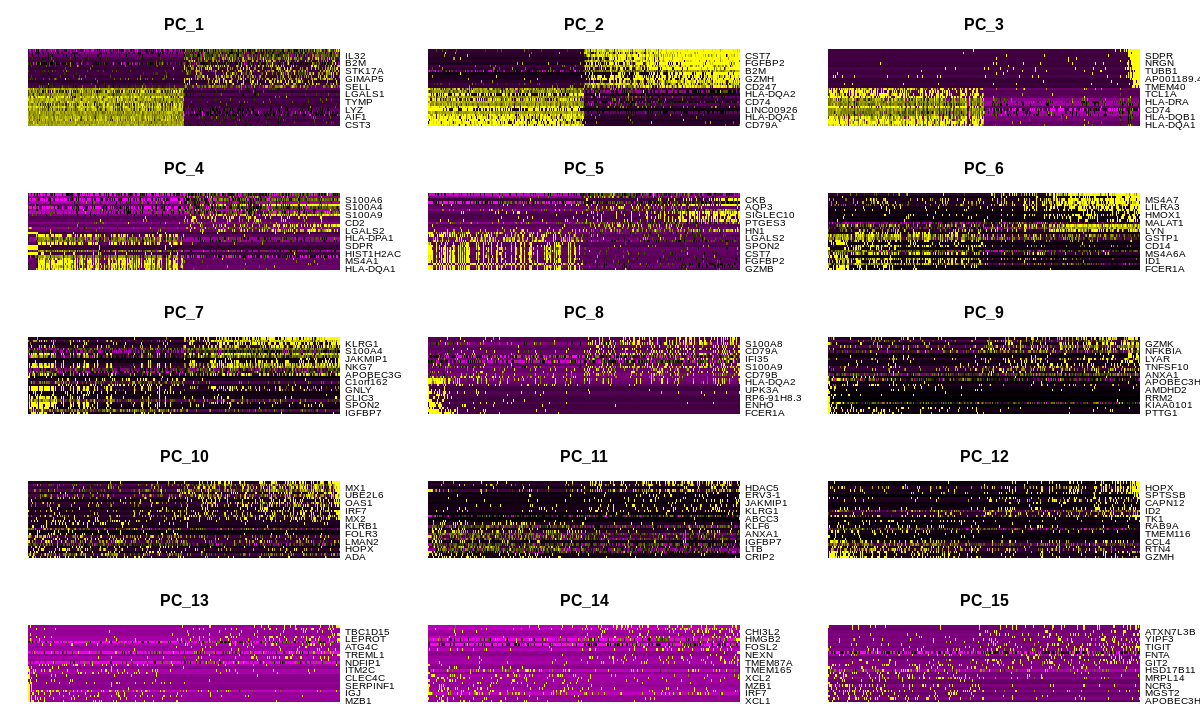

In [25]:
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

In [14]:
pbmc
#data: 正規化した値、scale.data: スケーリングした値(平均0分散1)

An object of class Seurat 
13714 features across 2638 samples within 1 assay 
Active assay: RNA (13714 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: pca

## Determine the ‘dimensionality’ of the dataset

- Seuratにおけるデータセットの次元数(主成分数)の決定方法\
 PCAを用いて、各主成分(PC)がデータの総分散に対してどれだけ寄与しているかを評価（Elbow plot：x軸:PC、y軸:各主成分がデータの総分散に対して寄与する割合(分散比)）
- Elbow plotの利点
 - 計算効率: JackStraw法などの他の評価手法に比べて計算負荷が低く、特に大規模な scRNA-seq データセットの解析に適する。
 - 簡易な解釈: エルボーの位置を視覚的に確認するだけで、主成分数の判断が容易に行える。\
→下流の解析に適した次元数を決定（データの圧縮とノイズ削減）\
\
- 複数のアプローチを推奨
 - 関連する異質性の原因を特定するためにPCを探索（GSEAと併用するなど）
 - ElbowPlot
 - 異なるPC数で解析を試みる（結果の安定性や再現性を確認）
 - PC の数を多めに選ぶ（少ない PC 数で解析すると、解析結果が著しく悪化する可能性がある。一般的には多め（10 以上）に選択することを推奨。）

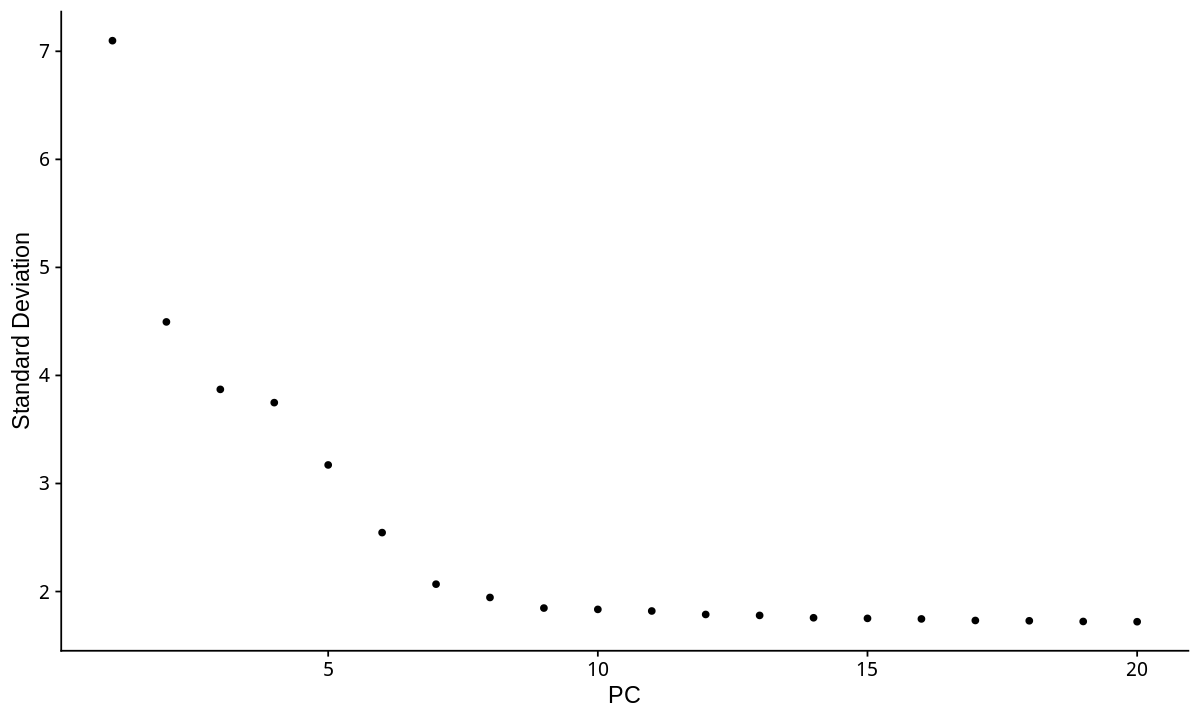

In [15]:
ElbowPlot(pbmc)

## Cluster the cells

Seuratを用いたscRNA-seqデータのクラスタリング方法
細胞をKNNグラフに埋め込み、類似した発現パターンを持つ細胞間にエッジを描画し、このグラフを相互接続された‘quasi-cliques’or‘communities’に分割する。\
1. 近傍グラフ(K-nearest neighbor (KNN) graph)の作成\
PCA空間におけるユークリッド距離に基づいてKNNグラフを構築し、ローカルな近傍領域における重複部分の共有度(Jaccard類似度)に基づいて任意の2つのセル間のエッジの重みを調整する。（FindNeighbors()関数）
2. Louvainアルゴリズムによるクラスタリング\
Louvain(SLM)アルゴリズムにより、細胞間のグラフをクラスター(コミュニティ)に分割。（FindClustersresolution()関数）
3. クラスタリング結果の確認\
Idents() 関数

In [16]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
##FindNeighbors()関数：KNNグラフの構築（dims = 1:10：入力としてPC1～10を使う。）
pbmc <- FindClusters(pbmc, resolution = 0.5)
##FindClusters() 関数：クラスタリング（resolution = 0.5：クラスタリングの粒度(詳細度)を調整。3,000個程度の単一細胞データセットに対しては通常0.4～1.2が良い。）

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95927

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 9
Elapsed time: 0 seconds


In [17]:
# Look at cluster IDs of the first 5 cells
head(Idents(pbmc), 5)

AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1 AAACCGTGCTTCCG-1 
               2                3                2                1 
AAACCGTGTATGCG-1 
               6 
Levels: 0 1 2 3 4 5 6 7 8

## Run non-linear dimensional reduction (UMAP/tSNE)

Seuratにおける非線形次元削減手法\
データセット内の潜在的な構造を学習し、似た細胞同士が低次元空間で近接するように配置する。クラスタリング手法で決定された細胞が、次元削減プロット上でも同じクラスターとして集まる。
 - tSNE(t-Distributed Stochastic Neighbor Embedding)：局所的な関係性（類似した細胞が近接すること）をより重視するため、小さなクラスターをより明確に表現するのに適する。
 - UMAP（Uniform Manifold Approximation and Projection）：tSNE に比べて、次元削減後のデータの構造を保持しやすく、視覚化されたクラスタがよりはっきりと分離されることが多い


In [18]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:03:44 UMAP embedding parameters a = 0.9922 b = 1.112

12:03:44 Read 2638 rows and found 10 numeric columns

12:03:44 Using Annoy for neighbor search, n_neighbors = 30

12:03:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:03:45 Writing NN index file to temp file /tmp/RtmpalDJrb/file11873f5e9421ff

12:03:45 Searching Annoy index using 1 thread, search_k = 3000

12:03:46 Annoy recall = 100%

12:03:46 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

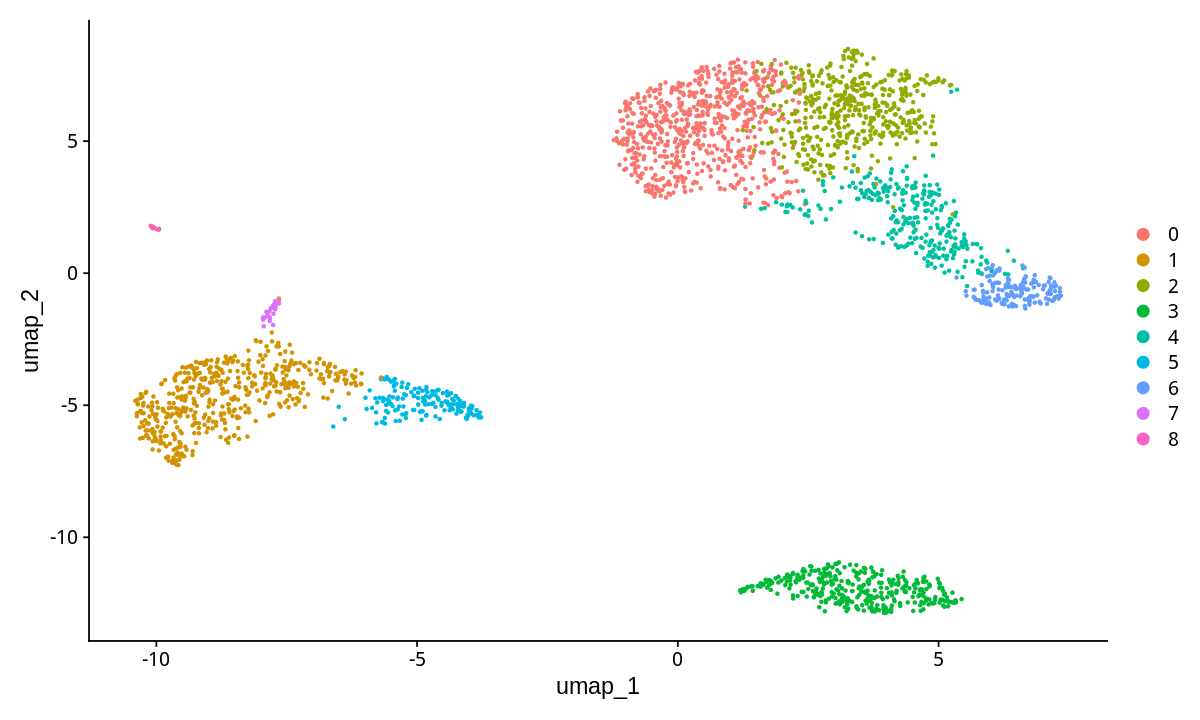

In [19]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(pbmc, reduction = "umap")

In [22]:
#ターミナルで実行
#cd work/seurat/
#mkdir -p output

#R
saveRDS(pbmc, file = "/home/oguma/work/seurat/output/pbmc_tutorial.rds")

## Finding differentially expressed features (cluster biomarkers)

Seuratでのマーカー遺伝子の同定と可視化
発現差(DE)によりクラスターを定義するマーカーを見つけることができる。（Seurat v5では、prestoパッケージを使用して、特に大規模なデータセットにおけるDE解析の速度を大幅に向上させる。min.pct、logfc.thresholdパラメータを増やすことで、DEテストの速度を向上させることができる。）

FindMarkers()関数：特定のクラスター(ident.1で指定)と他のすべてのクラスターを比較し、差異を示すマーカー遺伝子(ポジティブおよびネガティブマーカー）を特定する。
 - indent.2引数：特定のクラスター同士やクラスターのグループを比較する場合に指定）
 - test.use引数：テストフレームワークの指定。（例：ROC（受信者動作特性）テストを使用すると、マーカー遺伝子の「分類能力」を評価できる。）

FindAllMarkers()関数：データセット内のすべてのクラスターのマーカーを一度に見つけることができる。各クラスターの特異的なマーカーを見つけたい場合や、クラスター間の比較を行いたい場合に便利。

In [23]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(pbmc, ident.1 = 2)
head(cluster2.markers, n = 5)
##デフォルトでは、1つのクラスター(ident.1で指定)のポジティブおよびネガティブマーカーを、他のすべての細胞と比較する。

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IL32,2.892340e-90,1.3070772,0.947,0.465,3.966555e-86
LTB,1.060121e-86,1.3312674,0.981,0.643,1.453850e-82
CD3D,8.794641e-71,1.0597620,0.922,0.432,1.206097e-66
IL7R,3.516098e-68,1.4377848,0.750,0.326,4.821977e-64
LDHB,1.642480e-67,0.9911924,0.954,0.614,2.252497e-63


In [24]:
install.packages('devtools')
devtools::install_github('immunogenomics/presto')

 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/oguma/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 




stringi      (1.7.12   -> 1.8.4   ) [CRAN]
rlang        (1.1.1    -> 1.1.4   ) [CRAN]
lifecycle    (1.0.3    -> 1.0.4   ) [CRAN]
glue         (1.6.2    -> 1.8.0   ) [CRAN]
cli          (3.6.1    -> 3.6.3   ) [CRAN]
withr        (2.5.0    -> 3.0.1   ) [CRAN]
utf8         (1.2.3    -> 1.2.4   ) [CRAN]
fansi        (1.0.4    -> 1.0.6   ) [CRAN]
tidyselect   (1.2.0    -> 1.2.1   ) [CRAN]
Rcpp         (1.0.10   -> 1.0.13  ) [CRAN]
cpp11        (0.4.7    -> 0.5.0   ) [CRAN]
stringr      (1.5.0    -> 1.5.1   ) [CRAN]
purrr        (1.0.1    -> 1.0.2   ) [CRAN]
RcppArmad... (14.0.0-1 -> 14.0.2-1) [CRAN]
tidyr        (1.3.0    -> 1.3.1   ) [CRAN]
data.table   (1.15.4   -> 1.16.0  ) [CRAN]


Installing 16 packages: stringi, rlang, lifecycle, glue, cli, withr, utf8, fansi, tidyselect, Rcpp, cpp11, stringr, purrr, RcppArmadillo, tidyr, data.table

 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/oguma/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



── R CMD build ─────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/work/tmp/RtmpalDJrb/remotes11873f64c1d706/immunogenomics-presto-7636b3d/DESCRIPTION’
─  preparing ‘presto’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘presto_1.0.0.tar.gz’
   


 パッケージを ‘/rshare1/ZETTAI_path_WA_slash_home_KARA/home/oguma/R_4.1.3_library’ 中にインストールします 
 (‘lib’ が指定されていないため) 



In [25]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(pbmc, ident.1 = 5, ident.2 = c(0, 3))
head(cluster5.markers, n = 5)
##indent.2引数：特定のクラスター同士やクラスターのグループを比較する場合に指定.

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FCGR3A,8.246578e-205,6.794969,0.975,0.040,1.130936e-200
IFITM3,1.677613e-195,6.192558,0.975,0.049,2.300678e-191
CFD,2.401156e-193,6.015172,0.938,0.038,3.292945e-189
CD68,2.900384e-191,5.530330,0.926,0.035,3.977587e-187
RP11-290F20.3,2.513244e-186,6.297999,0.840,0.017,3.446663e-182


In [26]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE)
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)
##各クラスターのマーカー遺伝子のうち、平均対数fold change（avg_log2FC）が1を超えるものだけを抽出して報告

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.746131e-112,1.206019,0.912,0.592,5.137444e-108,0,LDHB
9.571984e-88,2.397366,0.447,0.108,1.312702e-83,0,CCR7
1.154695e-76,1.064113,0.845,0.406,1.583548e-72,0,CD3D
1.122405e-54,1.043529,0.731,0.400,1.539267e-50,0,CD3E
1.354319e-51,2.136530,0.342,0.103,1.857312e-47,0,LEF1
1.942957e-47,1.198913,0.629,0.359,2.664571e-43,0,NOSIP
2.806087e-44,1.526200,0.443,0.185,3.848268e-40,0,PIK3IP1
6.269443e-43,1.985307,0.330,0.112,8.597914e-39,0,PRKCQ-AS1
1.161169e-40,2.696721,0.200,0.040,1.592427e-36,0,FHIT


In [27]:
cluster0.markers <- FindMarkers(pbmc, ident.1 = 0, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)
##ROCテスト: 各マーカーがクラスタにどれだけ特異的かを評価し、0（ランダム）から1（完全な特異性）の範囲で「分類力」を示す。
##logfc.threshold: 対数フォールド変化の閾値を指定。
##only.pos = TRUE: 正のマーカーのみが出力される。
##クラスタ0における発現が有意に高い遺伝子のリストが含まれる。これを使用して、特定のクラスタに関連する遺伝子を特定し、さらなる解析を行うことができる。

Seuratにおけるマーカー発現を可視化するためのツール
- VlnPlot(): クラスタ間の発現確率分布を示す。
- FeaturePlot(): t-SNEやPCAプロット上での特徴の発現を可視化する。
- RidgePlot(): 発現の分布をリッジプロットとして表示する。
- CellScatter(): 2つの異なる特徴の関係を示す散布図を描く。
- DotPlot(): クラスタごとのマーカー発現を点の大きさと色で示す。

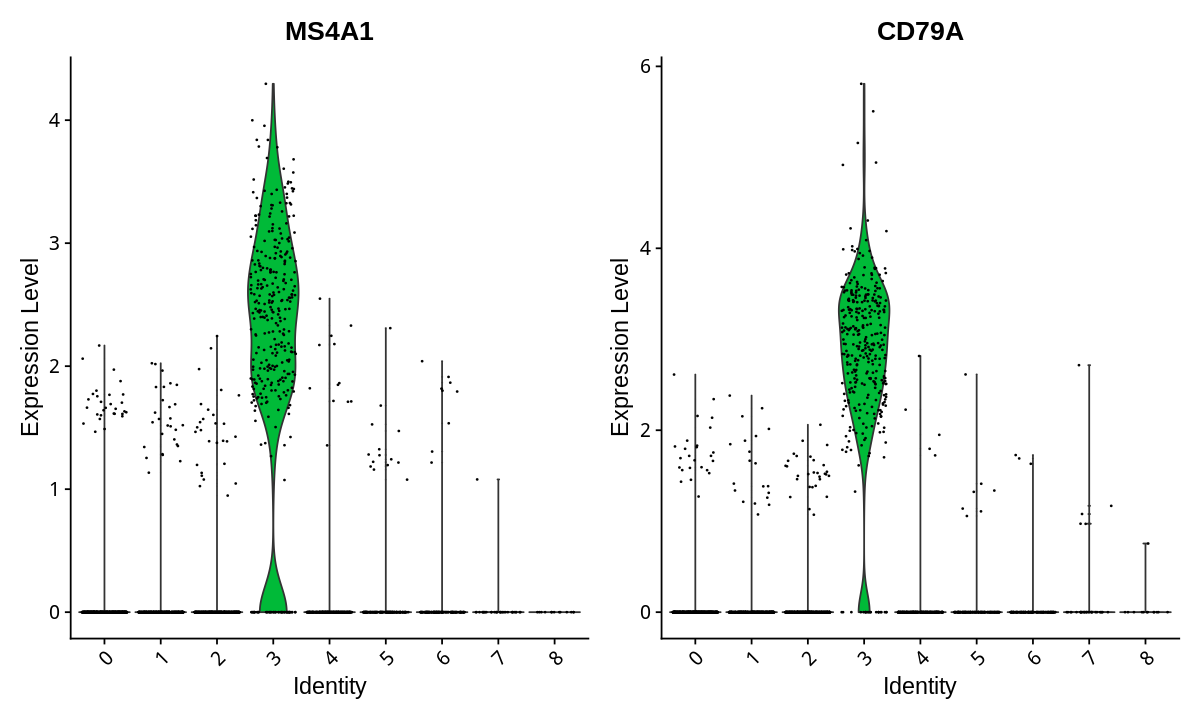

In [28]:
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))
##MS4A1 と CD79A の2つの遺伝子の発現をクラスタごとに可視化するためのバイオリンプロット

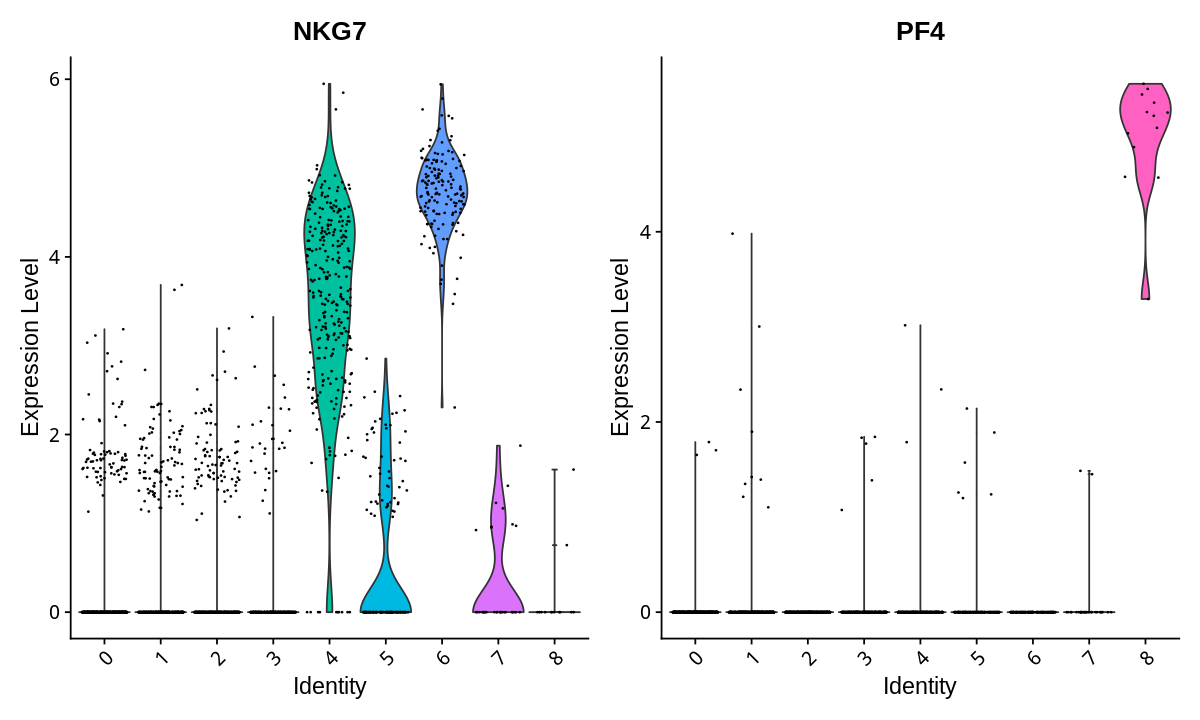

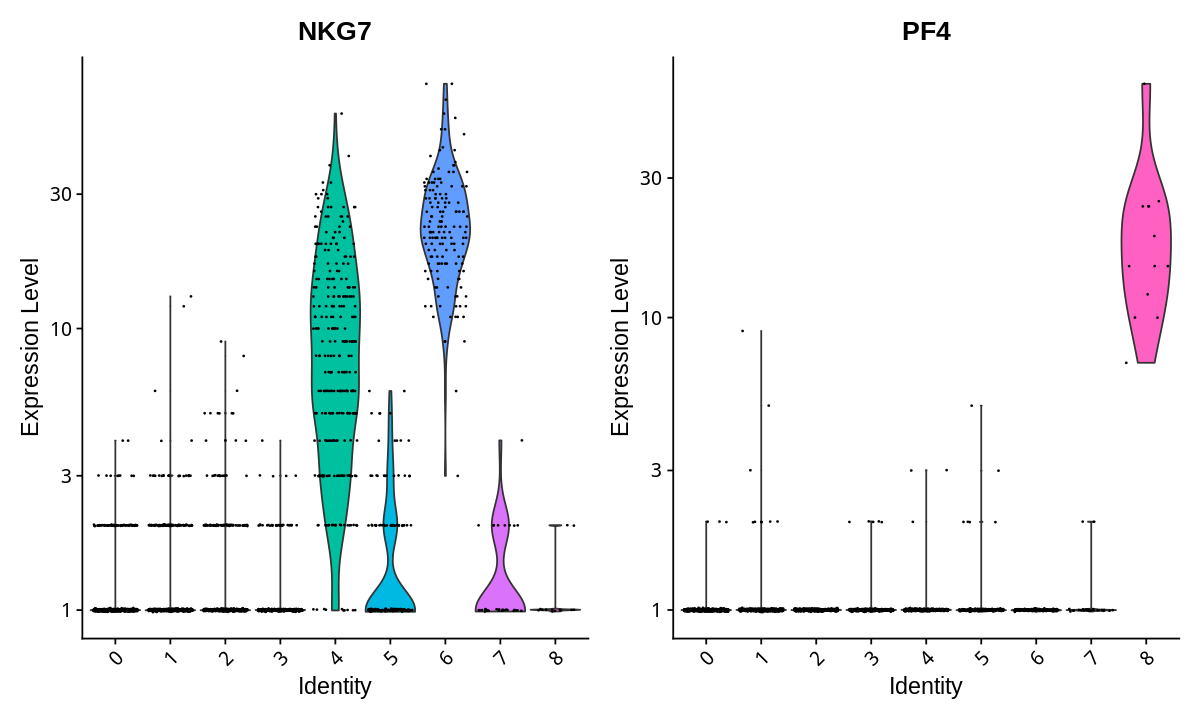

In [31]:
# you can plot raw counts as well
#VlnPlot(pbmc, features = c("NKG7", "PF4"), slot = "counts", log = TRUE)
VlnPlot(pbmc, features = c("NKG7", "PF4"))
VlnPlot(pbmc, features = c("NKG7", "PF4"), layer = "counts", log = TRUE)

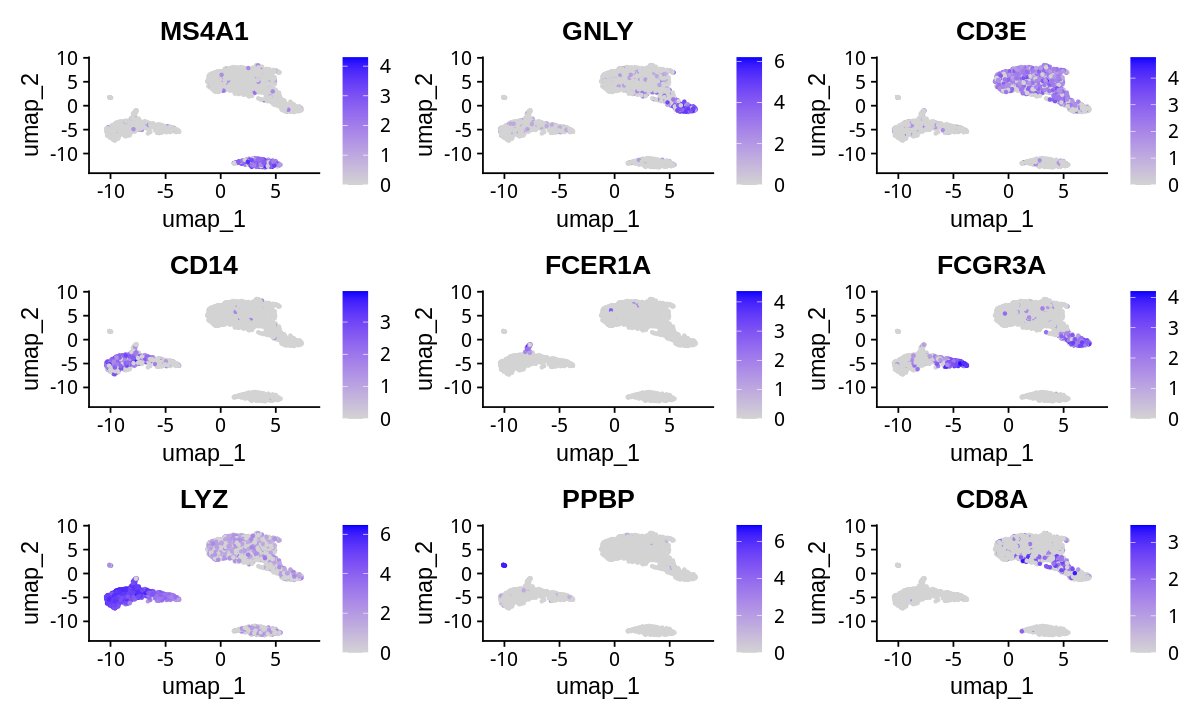

In [32]:
FeaturePlot(pbmc, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP",
    "CD8A"))
##指定した遺伝子の発現をt-SNEまたはUMAPプロット上に可視化（各プロットは、指定した遺伝子の発現レベルを色で示している。）
##特定の遺伝子が異なる細胞集団にどのように分布しているか→細胞の特性や機能を理解するために役立つ

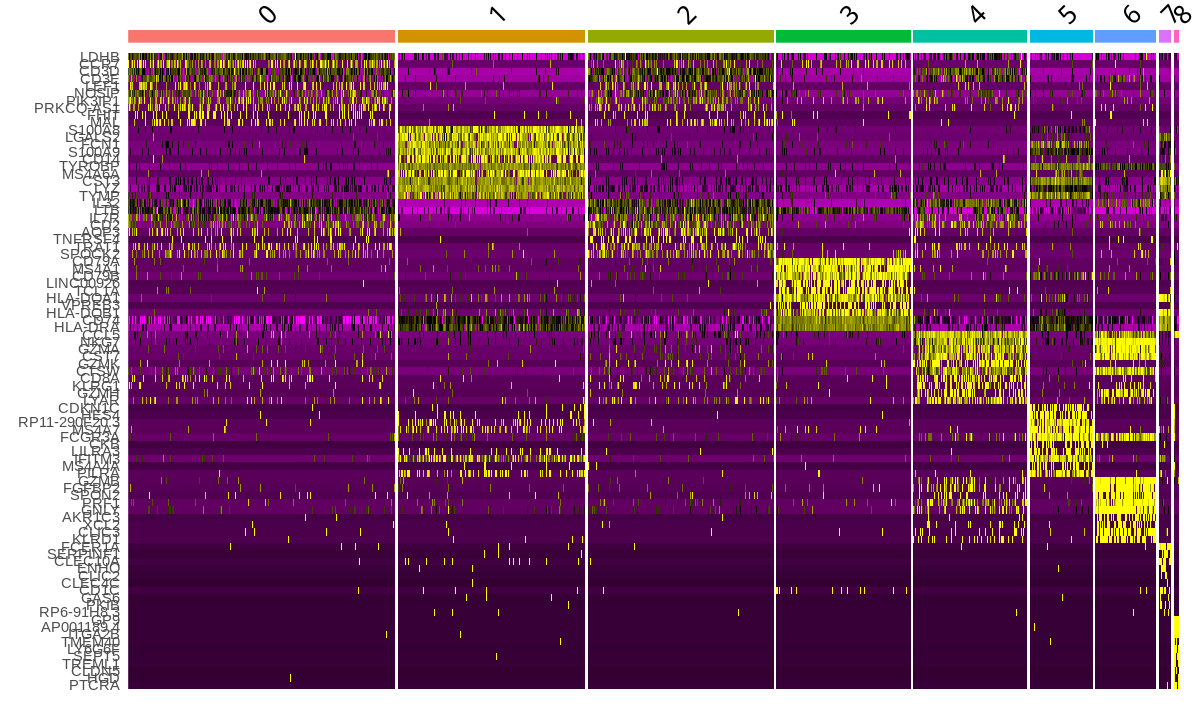

In [35]:
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(pbmc, features = top10$gene) + NoLegend()
##pbmc オブジェクトから上位10のマーカーを抽出し、その発現をヒートマップとして可視化
##各クラスターに特異的なマーカー遺伝子の発現パターンを視覚的に把握することができる
##NoLegend() ：加えることで、図の凡例を表示しない

## Assigning cell type identity to clusters

このデータセットの場合、カノニカルマーカーを利用することで、バイアスのないクラスタリング結果と既知の細胞型を簡単に対応付けることができる。

Cluster ID	Markers	Cell Type
0	IL7R, CCR7	Naive CD4+ T
1	CD14, LYZ	CD14+ Mono
2	IL7R, S100A4	Memory CD4+
3	MS4A1	B
4	CD8A	CD8+ T
5	FCGR3A, MS4A7	FCGR3A+ Mono
6	GNLY, NKG7	NK
7	FCER1A, CST3	DC
8	PPBP	Platelet

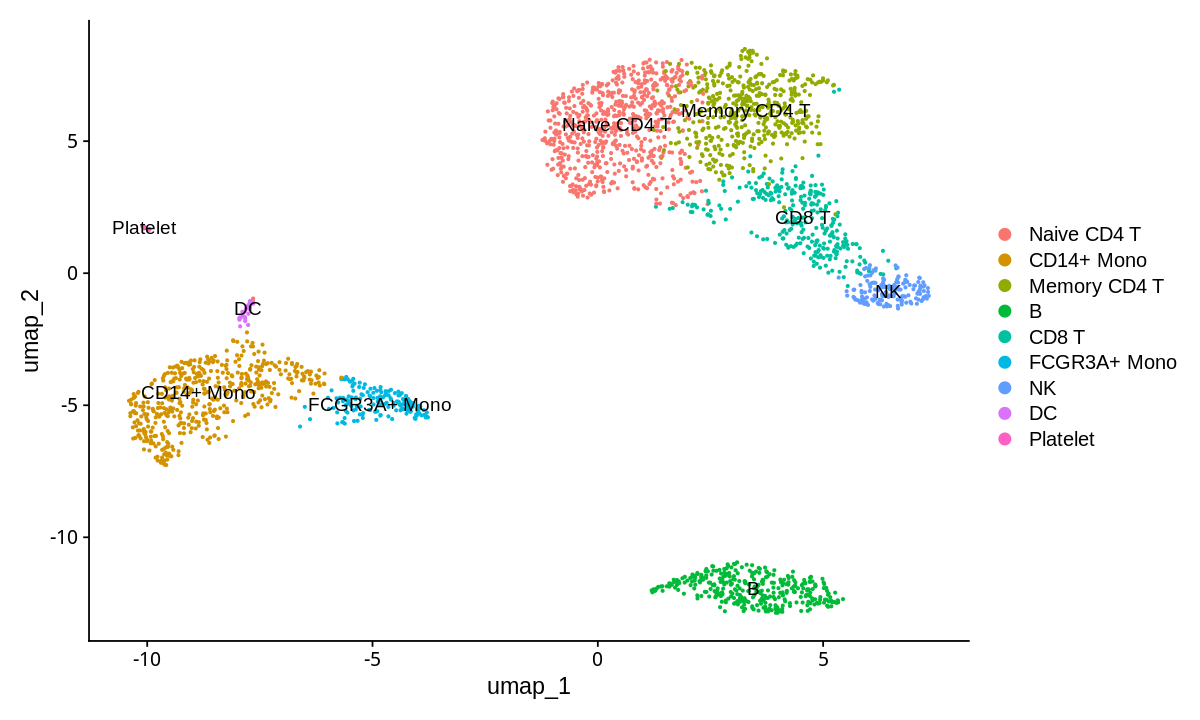

In [37]:
# 新しいクラスタIDを定義
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
# クラスタ名を更新
pbmc <- RenameIdents(pbmc, new.cluster.ids)
# UMAPプロットを生成し、新しいクラスタ名をラベルとして表示
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) #+ NoLegend()

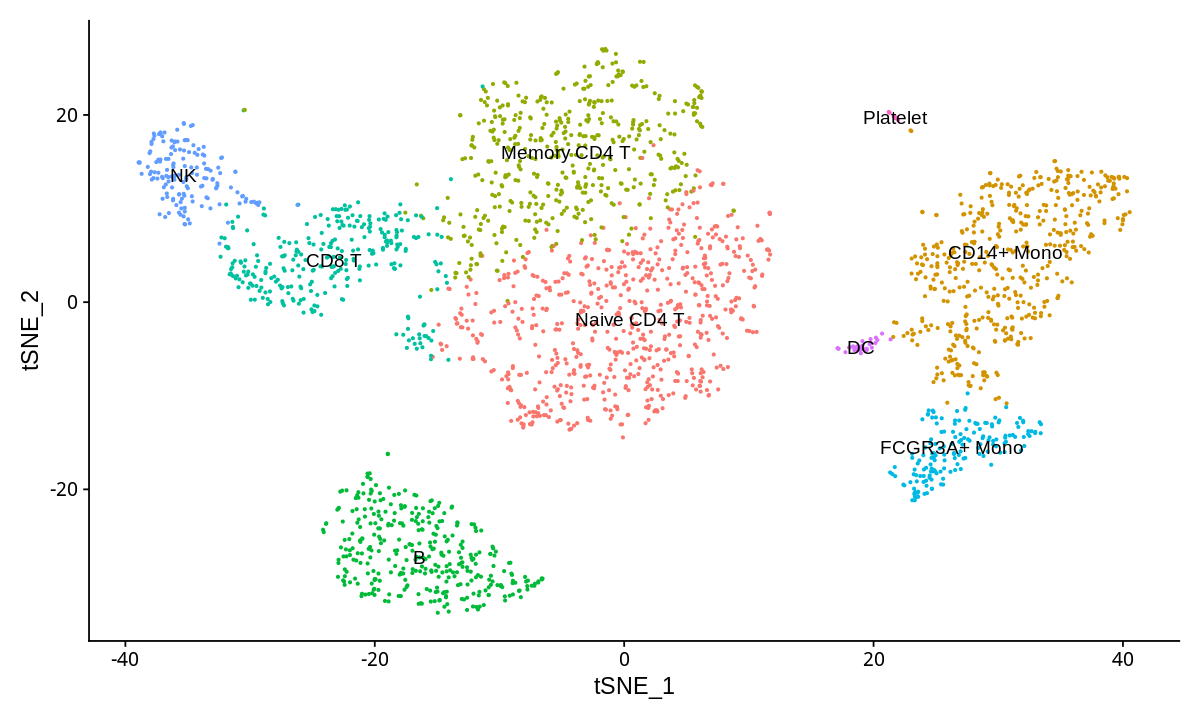

In [38]:
#tSNEは？
# tSNEの実行
pbmc <- RunTSNE(pbmc, dims = 1:10)

# tSNEのプロット
DimPlot(pbmc, reduction = "tsne", label = TRUE, pt.size = 0.5) + NoLegend()

In [39]:
saveRDS(pbmc, file = "/home/oguma/work/seurat/output/pbmc3k_final.rds")

In [40]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.8 (Ootpa)

Matrix products: default
BLAS/LAPACK: /rshare1/ZETTAI_path_WA_slash_home_KARA/home/khat1/miniconda3/envs/renv/lib/libopenblasp-r0.3.27.so

locale:
 [1] LC_CTYPE=ja_JP.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=ja_JP.UTF-8        LC_COLLATE=ja_JP.UTF-8    
 [5] LC_MONETARY=ja_JP.UTF-8    LC_MESSAGES=ja_JP.UTF-8   
 [7] LC_PAPER=ja_JP.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=ja_JP.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.3.0    Seurat_5.1.0       SeuratObject_5.0.2 sp_2.1-4          
[5] dplyr_1.1.4       

loaded via a namespace (and not attached):
  [1] uuid_1.1-0             spatstat.univar_3.0-1  spam_2.10-0           
  [4] plyr_1.8.8            